In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)


2.3.1
2.4.0


In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [4]:
# X_train

# Keras

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [7]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history])

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.7919 - val_loss: 0.3738 - val_accuracy: 0.8135
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3780 - accuracy: 0.8091 - val_loss: 0.3709 - val_accuracy: 0.8092
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3737 - accuracy: 0.8118 - val_loss: 0.3721 - val_accuracy: 0.8086
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3733 - accuracy: 0.8125 - val_loss: 0.3676 - val_accuracy: 0.8185
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3700 - accuracy: 0.8145 - val_loss: 0.3656 - val_accuracy: 0.8147
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3702 - accuracy: 0.8142 - val_loss: 0.3759 - val_accuracy: 0.8062
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3693 - accuracy: 0.8128 - val_loss: 0.3670 - val_accuracy: 0.8116

Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3608 - accuracy: 0.8171 - val_loss: 0.3660 - val_accuracy: 0.8155
Epoch 59/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3605 - accuracy: 0.8179 - val_loss: 0.3649 - val_accuracy: 0.8179
Epoch 60/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3600 - accuracy: 0.8215 - val_loss: 0.3722 - val_accuracy: 0.8183
Epoch 61/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8179 - val_loss: 0.3796 - val_accuracy: 0.8058
Epoch 62/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3601 - accuracy: 0.8175 - val_loss: 0.3655 - val_accuracy: 0.8145
Epoch 63/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3598 - accuracy: 0.8172 - val_loss: 0.3639 - val_accuracy: 0.8162
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3594 - accuracy: 0.8181 - val_loss: 0.3689 - val_accuracy:

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

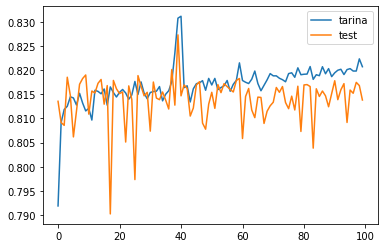

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = "tarina")
plt.plot(history.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

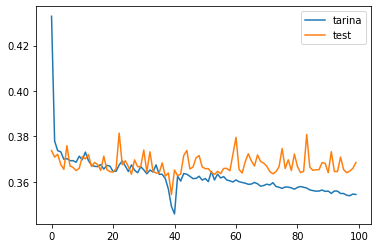

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = "tarina")
plt.plot(history.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [11]:
model.predict(X_test)

array([[0.00130993],
       [0.21827593],
       [0.5765464 ],
       ...,
       [0.7062723 ],
       [0.6718147 ],
       [0.7987005 ]], dtype=float32)

In [12]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 780us/step - loss: 0.3686 - accuracy: 0.8138


[0.3685561716556549, 0.8138114213943481]

In [13]:
print(model.predict(X_test).shape)
print(y_test.shape)

(15060, 1)
(15060,)


In [14]:
p = model.predict(X_test)
p[p<0.5]=0
p[p>0.5]=1
p

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [15]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= p )

0.8138114209827357

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

history_s = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_s])

(30162, 41)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3815 - accuracy: 0.8229 - val_loss: 0.3403 - val_accuracy: 0.8461
Epoch 2/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0

Epoch 52/100
943/943 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.8696 - val_loss: 0.3380 - val_accuracy: 0.8491
Epoch 53/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2755 - accuracy: 0.8692 - val_loss: 0.3380 - val_accuracy: 0.8481
Epoch 54/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2749 - accuracy: 0.8702 - val_loss: 0.3382 - val_accuracy: 0.8471
Epoch 55/100
943/943 [==============================] - 1s 2ms/step - loss: 0.2742 - accuracy: 0.8704 - val_loss: 0.3361 - val_accuracy: 0.8471
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.8708 - val_loss: 0.3370 - val_accuracy: 0.8461
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.8726 - val_loss: 0.3373 - val_accuracy: 0.8474
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2722 - accuracy: 0.8714 - val_loss: 0.3381 - val_accuracy:

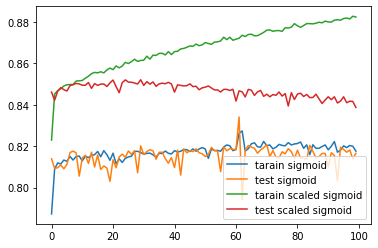

In [17]:
plt.plot(history.history['accuracy'], label = "tarain sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

plt.plot(history_s.history['accuracy'], label = "tarain scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

plt.legend()
plt.show()

# Zad

Porównaj fukcje aktywacji
* sigmoid
* tanh
* relu

# tanh

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_tanh = History()
model = Sequential()
model.add(Dense(100,activation="tanh",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="tanh"))
model.add(Dense(10,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_tanh])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8368 - val_loss: 0.3312 - val_accuracy: 0.8449
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3268 - accuracy: 0.8472 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2223 - accuracy: 0.8967 - val_loss: 0.3858 - val_accuracy: 0.8383
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2211 - accuracy: 0.8956 - val_loss: 0.3916 - val_accuracy: 0.8364
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2196 - accuracy: 0.8967 - val_loss: 0.3921 - val_accuracy: 0.8361
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2182 - accuracy: 0.8978 - val_loss: 0.3944 - val_accuracy: 0.8323
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2181 - accuracy: 0.8978 - val_loss: 0.3946 - val_accuracy: 0.8353
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2160 - accuracy: 0.8992 - val_loss: 0.3956 - val_accuracy: 0.8362
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2152 - accuracy: 0.8995 - val_loss: 0.4000 - val_accuracy:

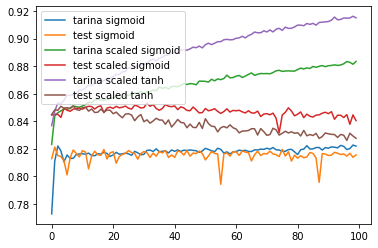

In [22]:
plt.plot(history.history['accuracy'], label = "tarina sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

plt.plot(history_s.history['accuracy'], label = "tarina scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

plt.plot(history_tanh.history['accuracy'], label = "tarina scaled tanh")
plt.plot(history_tanh.history['val_accuracy'], label = "test scaled tanh")

plt.legend()
plt.show()

# relu

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history_relu = History()
model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_relu])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8397 - val_loss: 0.3288 - val_accuracy: 0.8486
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3175 - accuracy: 0.8524 - val_

Epoch 52/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2334 - accuracy: 0.8894 - val_loss: 0.4729 - val_accuracy: 0.8383
Epoch 53/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2298 - accuracy: 0.8882 - val_loss: 0.4583 - val_accuracy: 0.8363
Epoch 54/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2289 - accuracy: 0.8913 - val_loss: 0.4608 - val_accuracy: 0.8343
Epoch 55/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2292 - accuracy: 0.8903 - val_loss: 0.4710 - val_accuracy: 0.8375
Epoch 56/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2291 - accuracy: 0.8915 - val_loss: 0.4736 - val_accuracy: 0.8340
Epoch 57/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2276 - accuracy: 0.8917 - val_loss: 0.4532 - val_accuracy: 0.8347
Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2273 - accuracy: 0.8919 - val_loss: 0.4752 - val_accuracy:

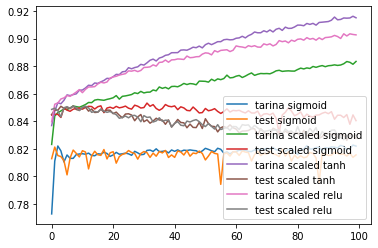

In [24]:
plt.plot(history.history['accuracy'], label = "tarina sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

plt.plot(history_s.history['accuracy'], label = "tarina scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

plt.plot(history_tanh.history['accuracy'], label = "tarina scaled tanh")
plt.plot(history_tanh.history['val_accuracy'], label = "test scaled tanh")

plt.plot(history_relu.history['accuracy'], label = "tarina scaled relu")
plt.plot(history_relu.history['val_accuracy'], label = "test scaled relu")

plt.legend()
plt.show()

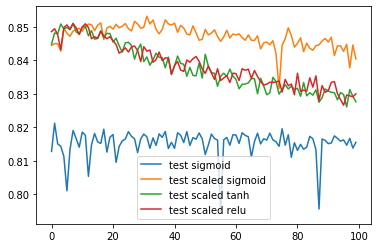

In [25]:
# plt.plot(history.history['accuracy'], label = "tarina sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

# plt.plot(history_s.history['accuracy'], label = "tarina scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

# plt.plot(history_tanh.history['accuracy'], label = "tarina scaled tanh")
plt.plot(history_tanh.history['val_accuracy'], label = "test scaled tanh")

# plt.plot(history_relu.history['accuracy'], label = "tarina scaled relu")
plt.plot(history_relu.history['val_accuracy'], label = "test scaled relu")

plt.legend()
plt.show()